In [254]:
import pandas as pd

# data source: https://www.middleschoolchemistry.com/lessonplans/chapter5/lesson6

df = pd.DataFrame({
    "temp": [0, 20, 40, 60, 80, 100],
    "sugar": [179, 204, 241, 288, 363, 487]
})

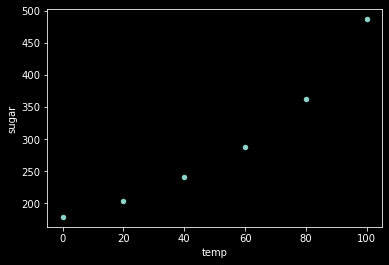

In [255]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
df.plot.scatter(x='temp', y='sugar')
plt.show()

In [256]:
power_range = [1,2,3,4]

df_tain = pd.DataFrame()

for power in power_range:
    df_tain[f'temp_{power}'] = df.temp**power

y = df.sugar
X = df_tain

In [257]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X, y)

coef = list(model.coef_)
intercept = model.intercept_
score = model.score(X, y)

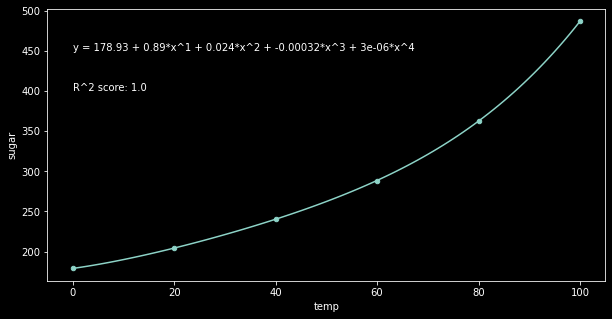

In [258]:
from math import log10, floor
import numpy as np

def round_to_2(x):
    return round(x, 1-int(floor(log10(abs(x)))))


X_space = pd.DataFrame(
    {f'temp_{power}': np.arange(0, 101)**power for power in power_range}
)
y_pred_space = model.predict(X_space)

equation = "y = " + str(round(intercept,2)) + " + " + " + ".join([f"{round_to_2(coef[power-1])}*x^{power}" for power in power_range])

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(X_space.temp_1, y_pred_space)
df.plot.scatter(x='temp', y='sugar', ax=ax);
plt.text(0, 450, equation)
plt.text(0, 400, f"R^2 score: {round(score, 4)}");

In [352]:
coffee = [200, 80]
milk = [20, 5]
mix = [coffee[0]+milk[0], (coffee[0]*coffee[1] + milk[0]*milk[1])/(coffee[0]+milk[0])]
mix

[220, 73.18181818181819]

In [353]:
X_sample_mix = np.array([mix[1]**power for power in power_range]).reshape(-1, 1).T
y_sample_mix = (model.predict(X_sample_mix)*(mix[0]/100)).item()

X_sample_coffee = np.array([coffee[1]**power for power in power_range]).reshape(-1, 1).T
y_sample_coffee = (model.predict(X_sample_coffee)*(coffee[0]/100)).item()

C:\Users\Mateusz\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Mateusz\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [362]:
print(f"W {coffee[0]}g kawy ({coffee[1]}°C) rozpuści się {round(y_sample_coffee)}g cukru")
print(f"W {coffee[0]}g kawy ({coffee[1]}°C) zmiesznaej z  {milk[0]}g mleka ({milk[1]}°C) w sumie ({mix[0]}g {round(mix[1])}°C) rozpuści się {round(y_sample_mix)}g cukru")

W 200g kawy (80°C) rozpuści się 725g cukru
W 200g kawy (80°C) zmiesznaej z  20g mleka (5°C) w sumie (220g 73°C) rozpuści się 733g cukru
